# **Analysis using the Parch and Posey Database.**
## **Introduction**

This project aims to uncover valuable insights from the Parch and Posey database, a comprehensive dataset containing information about a company's sales, accounts, and regional operations. By leveraging advanced data analysis techniques and visualization tools, we intend to extract meaningful patterns and trends that can drive strategic decision-making and operational improvements.
## **Data Model**
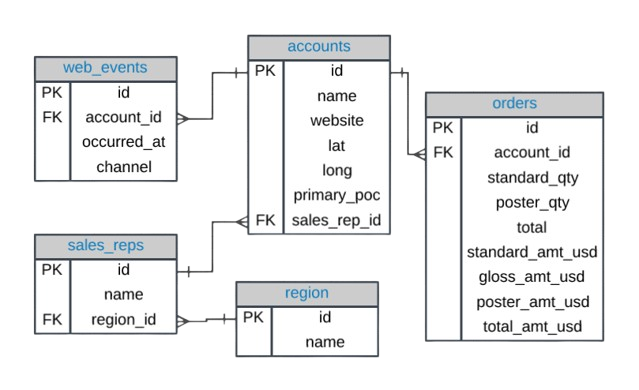


# **Loading Data & Preparation.**

In [2]:
#Importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load data
accounts_df = pd.read_csv('/content/drive/MyDrive/posey-data/accounts.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/posey-data/orders.csv')
sales_rep_df = pd.read_csv('/content/drive/MyDrive/posey-data/sales_reps.csv')
region_df = pd.read_csv('/content/drive/MyDrive/posey-data/region.csv')

# Merge data
merged_df = orders_df.merge(accounts_df, left_on='account_id', right_on='id', suffixes=('', '_account'))
merged_df = merged_df.merge(sales_rep_df, left_on='sales_rep_id', right_on='id', suffixes=('', '_sales_rep'))
merged_df = merged_df.merge(region_df, left_on='region_id', right_on='id', suffixes=('', '_region'))

In [9]:
# First 5 rows.
merged_df.head()

,id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,...,website,lat,long,primary_poc,sales_rep_id,id_sales_rep,name_sales_rep,region_id,id_region,name_region
0,1,1001,2015-10-06T17:31:14.000Z,123.0,22.0,24.0,169.0,613.77,164.78,194.88,...,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500,321500,Samuel Racine,1,1,Northeast
1,2,1001,2015-11-05T03:34:33.000Z,190.0,41.0,57.0,288.0,948.10,307.09,462.84,...,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500,321500,Samuel Racine,1,1,Northeast
2,3,1001,2015-12-04T04:21:55.000Z,85.0,47.0,NaN,132.0,424.15,352.03,0.00,...,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500,321500,Samuel Racine,1,1,Northeast
3,4,1001,2016-01-02T01:18:24.000Z,144.0,32.0,NaN,176.0,718.56,239.68,0.00,...,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500,321500,Samuel Racine,1,1,Northeast
4,5,1001,2016-02-01T19:27:27.000Z,108.0,29.0,28.0,165.0,538.92,217.21,227.36,...,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500,321500,Samuel Racine,1,1,Northeast


In [10]:
# Summary Statistics
merged_df.describe()

,id,account_id,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd,id_account,lat,long,sales_rep_id,id_sales_rep,region_id,id_region
count,6912.000000,6912.000000,6087.000000,5894.000000,5763.000000,6892.000000,6912.000000,6912.000000,6912.000000,6912.000000,6912.000000,6912.000000,6912.000000,6912.000000,6912.000000,6912.000000,6912.000000
mean,3456.500000,2662.362847,318.440283,172.000848,125.567586,533.337928,1399.355692,1098.547420,850.116539,3348.019651,2662.362847,38.163634,-90.309247,321772.268519,321772.268519,2.424624,2.424624
std,1995.466863,1011.454865,451.411907,386.972197,548.844922,762.089514,2175.706615,2715.116802,4086.988574,5462.142100,1011.454865,4.041100,17.336519,142.849755,142.849755,1.182930,1.182930
min,1.000000,1001.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1001.000000,30.421911,-122.682215,321500.000000,321500.000000,1.000000,1.000000
25%,1728.750000,1741.000000,98.000000,19.000000,16.000000,217.750000,259.480000,74.900000,64.960000,1414.470000,1741.000000,34.052189,-99.043919,321640.000000,321640.000000,1.000000,1.000000
50%,3456.500000,2611.000000,301.000000,39.000000,33.000000,481.000000,1447.100000,232.190000,203.000000,2482.855000,2611.000000,38.717586,-84.380699,321800.000000,321800.000000,3.000000,3.000000
75%,5184.250000,3471.000000,496.000000,198.750000,157.500000,604.000000,2455.080000,749.000000,747.040000,3361.915000,3471.000000,41.876949,-75.771936,321890.000000,321890.000000,3.000000,3.000000
max,6912.000000,4501.000000,22591.000000,14281.000000,28262.000000,28799.000000,112729.090000,106964.690000,229487.440000,232207.070000,4501.000000,45.555651,-71.051332,321990.000000,321990.000000,4.000000,4.000000


# **Analysis.**

## **1. Sales Performance by Sales Representative**


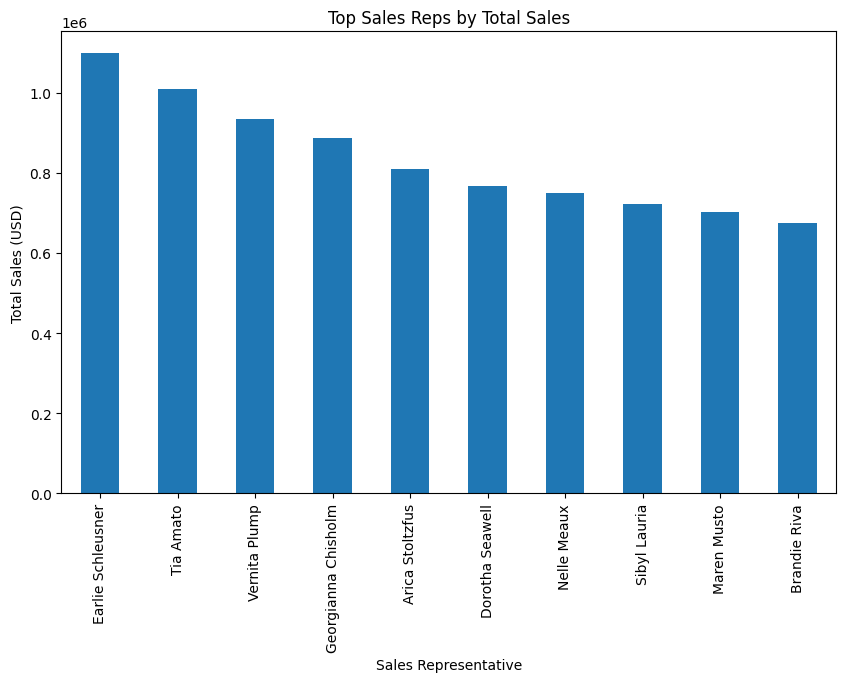

In [18]:
# Top 10
sales_rep_performance = merged_df.groupby('name_sales_rep')['total_amt_usd'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sales_rep_performance.plot(kind='bar', title="Top Sales Reps by Total Sales")
plt.xlabel("Sales Representative")
plt.ylabel('Total Sales (USD)')
plt.show()

## **2. Sales by Region**

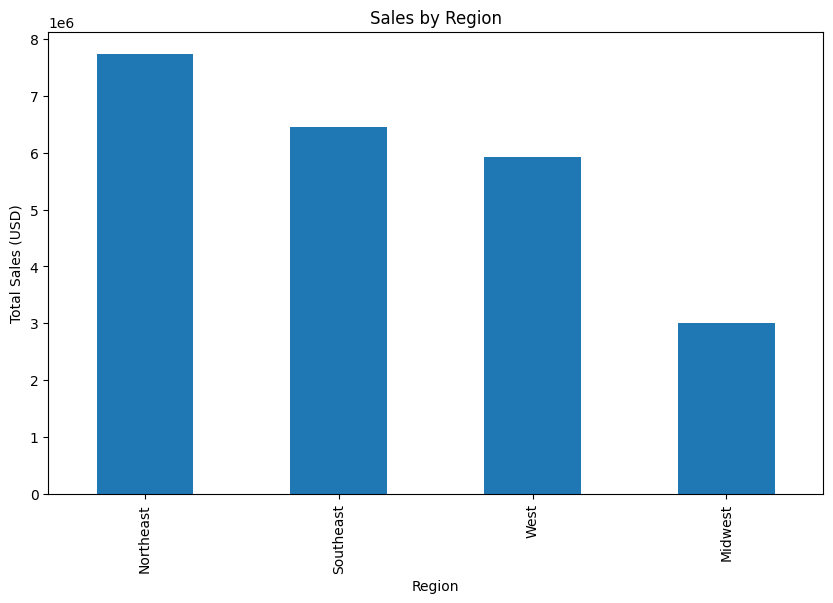

In [14]:
region_sales = merged_df.groupby('name_region')['total_amt_usd'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', title="Sales by Region")
plt.xlabel("Region")
plt.ylabel('Total Sales (USD)')
plt.show()

## **3. Monthly Sales Trend**

<ipython-input-15-b19b03b517b1>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df['month'] = merged_df['occurred_at'].dt.to_period('M')


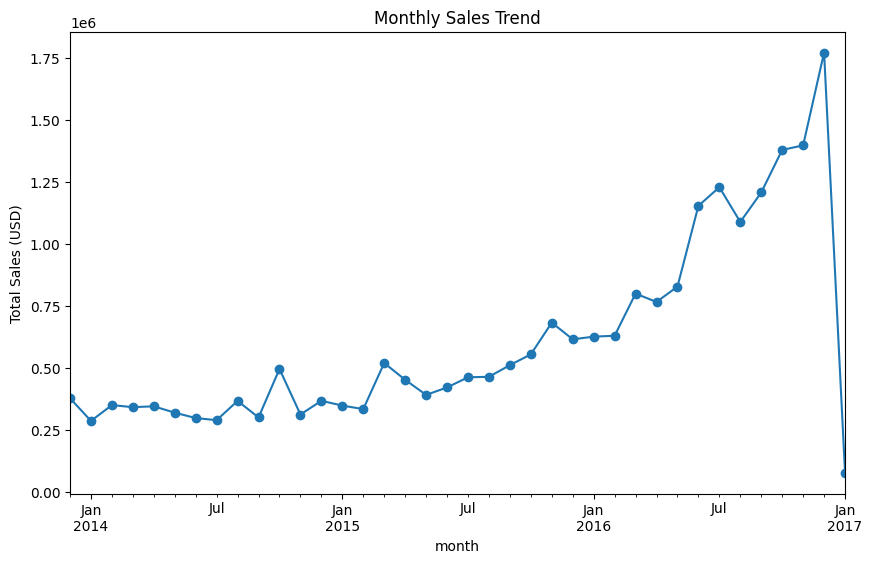

In [15]:
merged_df['occurred_at'] = pd.to_datetime(merged_df['occurred_at'])
merged_df['month'] = merged_df['occurred_at'].dt.to_period('M')
monthly_sales = merged_df.groupby('month')['total_amt_usd'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(title="Monthly Sales Trend", marker='o')
plt.ylabel('Total Sales (USD)')
plt.show()

## **4. Top 10 Accounts by Total Revenue**

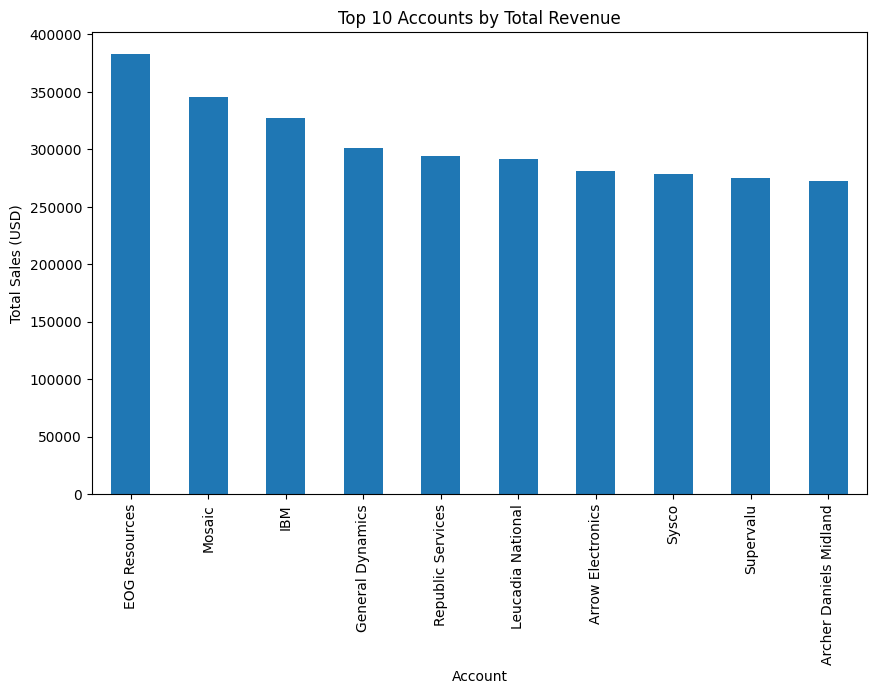

In [19]:
top_accounts = merged_df.groupby('name')['total_amt_usd'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_accounts.plot(kind='bar', title="Top 10 Accounts by Total Revenue")
plt.xlabel("Account")
plt.ylabel('Total Sales (USD)')
plt.show()

## **5. Average Order Value by Account**

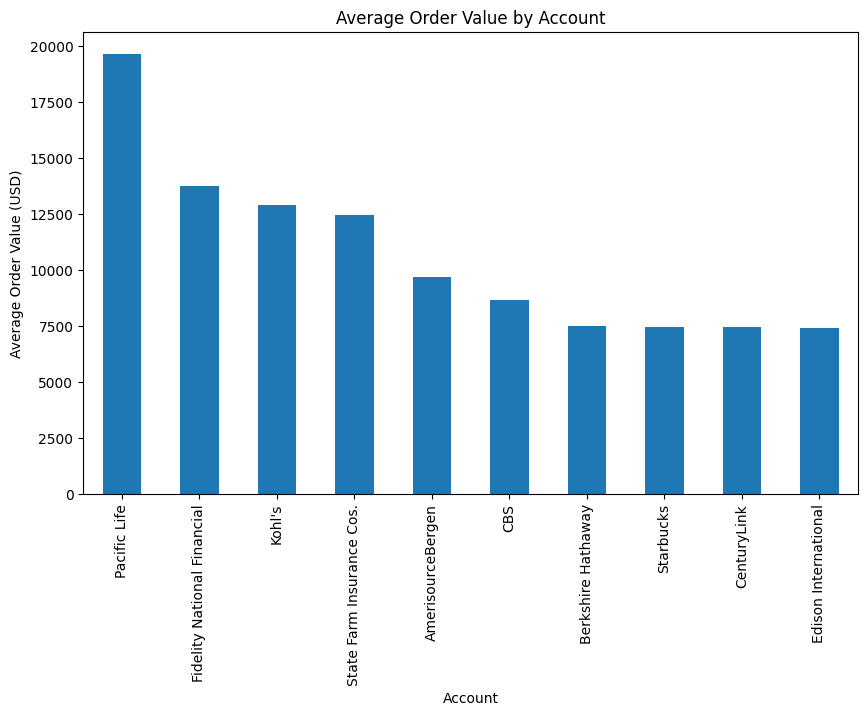

In [22]:
# Top 10
average_order_value = merged_df.groupby('name')['total_amt_usd'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
average_order_value.plot(kind='bar', title="Average Order Value by Account")
plt.xlabel("Account")
plt.ylabel('Average Order Value (USD)')
plt.show()